In [1]:
import DSGRN
import Berry_2019_figures_results as Berry

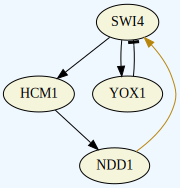

In [2]:
wavepool = DSGRN.Network("good_wavepool.txt")
swapped = DSGRN.Network("bad_wavepool.txt")
DSGRN.DrawGraph(wavepool)

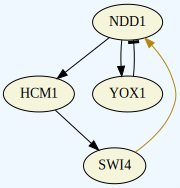

In [3]:
DSGRN.DrawGraph(swapped)

In [5]:
wt1_file = "WT1_WT2_microarray_interpolated/wt1_microarray_coregenes_lifepoints_interpol_trim.csv"
wt2_file = "WT1_WT2_microarray_interpolated/wt2_microarray_coregenes_lifepoints_interpol.csv"
epsilons = [0.0, 0.01, 0.05, 0.1]
posets1 = Berry.getposets(wt1_file,"row",epsilons)
posets2 = Berry.getposets(wt2_file,"row",epsilons)

In [ ]:
wavepool_parameter_matches=[]
swapped_parameter_matches=[]